In [1]:
%pylab inline
#import matplotlib as plt
#import numpy as np
import pandas as pd
import uncertainties
from uncertainties import unumpy as unp
from uncertainties import ufloat

def gaussian(x, mu, sigma, B, A):
    return A * np.e ** ((-1 * (x - mu) ** 2) / (2 * sigma ** 2)) + B

def gausfit_pm(x, y, p0=None):
    import numpy as np
    return fit_pm(x, y, func=lambda x, mu, sigma, B, A: A * np.e ** ((-1 * (x - mu) ** 2) / (2 * sigma ** 2)) + B,
                  p0=p0)


def fit_pm(x, y, func=lambda x: x, p0=None):
    """
        fit_pm takes data points and makes an exponential curve fit. It returns
        the parameters with errors and the coefficient of determination
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: Function to be fitted to.
        Returns:
        -----------
        list: Gives back a list with the parameters of an expotential function the
              corresponding errors and the coefficient of determination.
    """
    from scipy.optimize import curve_fit
    import numpy as np
    popt, pcov = curve_fit(func, x, y, p0=p0)
    params = popt.copy()
    errors = np.sqrt(np.diag(pcov))
    r = np.array(y) - func(np.array(x), *params)
    rss = np.sum(r ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    R_2 = 1 - (rss / tss)
    try:
        from uncertainties import unumpy as unp
        return unp.uarray(params, errors), R_2
    except:
        return np.array(params), np.array(errors), R_2


def val(x):
    from uncertainties import unumpy
    try:
        return unumpy.nominal_values(x)
    except TypeError:
        return x


def err(x):
    from uncertainties import unumpy
    return unumpy.std_devs(x)

Populating the interactive namespace from numpy and matplotlib


# Test plot of one datapoint

In [2]:
df = pd.read_csv("dx_1.csv",index_col=0)
ch1=df.iloc[1:,0]
ch2 = df.iloc[1:,1]

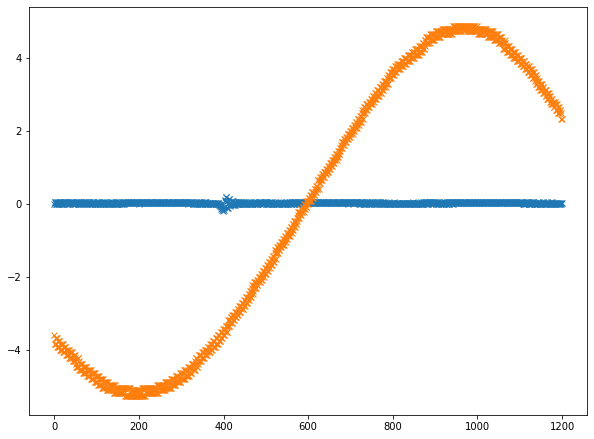

In [3]:
x = np.arange(len(ch1))
y = array([float(item) for item in ch1.to_numpy()],dtype=float64)
y2 = array([float(item) for item in ch2.to_numpy()],dtype=float64)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size
plt.plot(x,y,"x")
plt.plot(x,y2,"x")
#plt.ylim(-10,50)
#ax = plt.gca()
#ax.tick_label(float(ch1.to_numpy()))
plt.show()

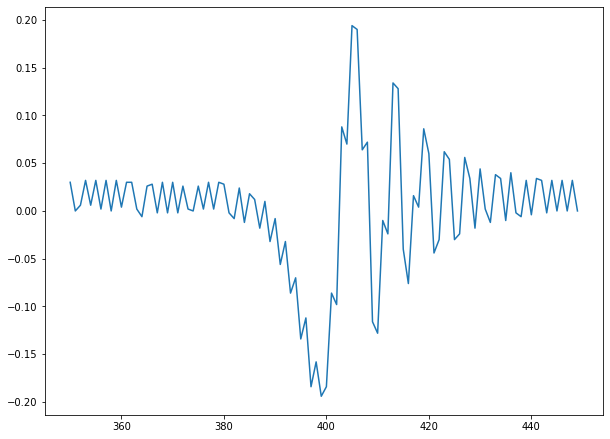

In [4]:
plt.plot(x[350:450],y[350:450])

# Copy of the errordata

In [5]:
mu = ufloat(0.02720,0.00018)
sigma = ufloat(0.00248,0.00025)

In [6]:
upper_bound = mu + 2 * sigma
lower_bound = mu - 2 * sigma

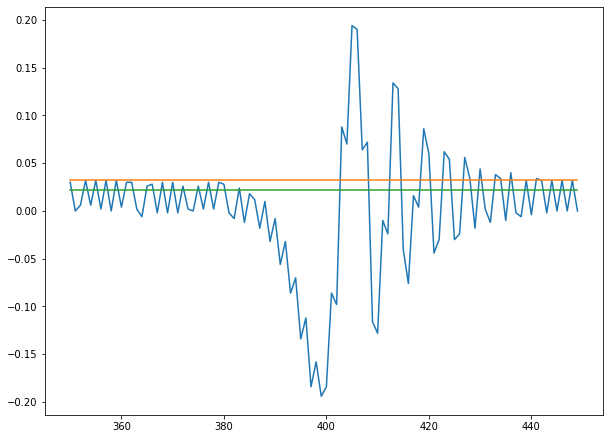

In [7]:
plt.plot(x[350:450],y[350:450])
plt.plot(x[350:450],[val(upper_bound) for item in x[350:450]])#(upper_bound))
plt.plot(x[350:450],[val(lower_bound) for item in x[350:450]])

# Read all data

In [8]:
filenames = ["dx_1.csv","dx_2.csv","dx_3.csv","dx_4.csv","dx_5.csv"]
#data = [[a_ch1,a_ch2],[b_ch1,b_ch2],[c_ch1,c_ch2],[d_ch1,d_ch2],[e_ch1,e_ch2]]
data= []
for file in filenames:
    df = pd.read_csv(file,index_col=0)
    data.append([array([float(item) for item in df.iloc[1:,0].to_numpy()],
                      dtype=float64),array([float(item) for item in df.iloc[1:,1].to_numpy()],dtype=float64)])

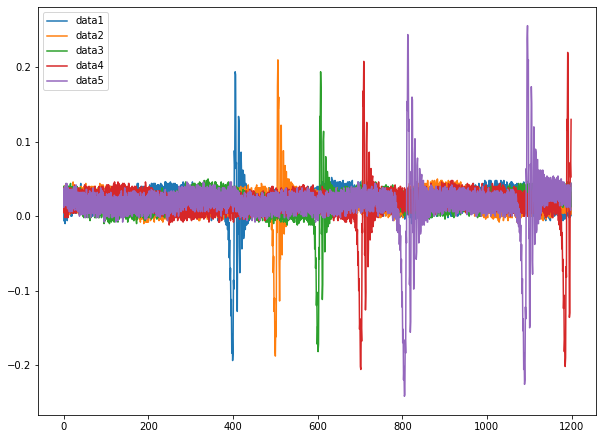

In [9]:
iterator = 0
for [ch1,ch2] in data:
    iterator +=1
    x = np.arange(len(ch1))
    y = ch1
    y2 = ch2
    plt.plot(x,y,label="data{:}".format(iterator))
#plt.plot(x,y2,"x",label="sine{:}".format(iterator))
plt.legend()
plt.show()

-0.032
-0.04
-0.044
-0.038
-0.038


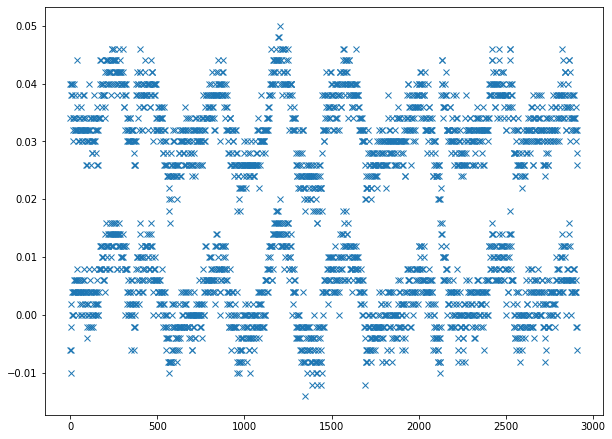

1453


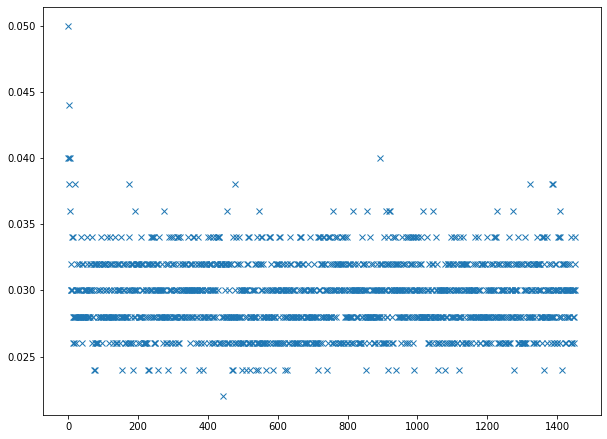

mu 0.02919+/-0.00015
sigma 0.00283+/-0.00019
 Offset-5+/-13
 Amplitude424+/-21


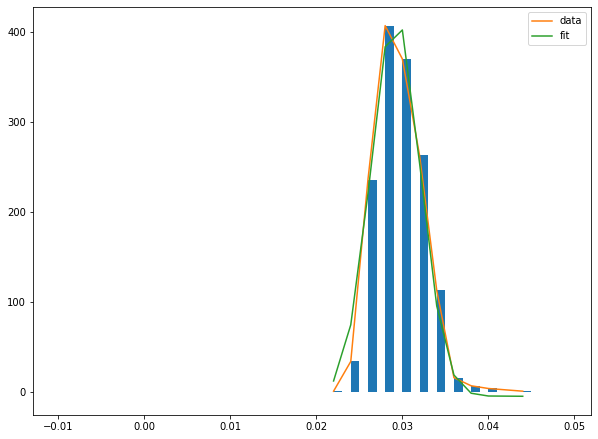

In [35]:
thresh = -0.03
errorpoints = []
for [ch1,ch2] in data:
    iterator = 0
    for item in ch1:
        #print(iterator)
        if item < thresh:
            print(item)
            errorpoints.append(ch1[0:iterator-10])
            break
        iterator += 1

array(errorpoints)
y_errorplot = np.concatenate(errorpoints)
plt.plot(np.arange(len(y_errorplot)),y_errorplot,"x")
plt.show()
err_abs=[]
for errange in errorpoints:
    if len(errange)%2 !=0:
        errange=errange[0:-1]
    err_abs.append(abs(errange[0::2]-errange[1::2]))
err_abs=np.concatenate(err_abs)

print(len(err_abs))
plt.plot(np.arange(len(err_abs)),err_abs,"x")
plt.show()

bins = plt.hist(err_abs,bins=np.arange(-0.01,0.05,0.001))
errfit_x,errfit_y = bins[1][0:-1], bins[0]
internalx,internaly = [],[]
for i in range(len(errfit_y)):
    if errfit_y[i] != 0:
        internalx.append(errfit_x[i])
        internaly.append(errfit_y[i])
errfit_x = array(internalx)
errfit_y = internaly

[params,errs] = gausfit_pm(errfit_x,errfit_y)
print("mu {:}\nsigma {:}\n Offset{:}\n Amplitude{:}".format(*params))
plt.plot(errfit_x,errfit_y,label="data")
plt.plot(errfit_x,gaussian(errfit_x,*val(params)),label="fit")

plt.legend()
plt.show()

# Test of errorcalc

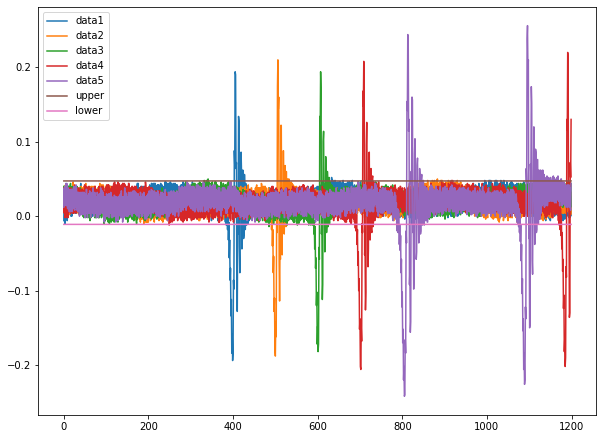

In [36]:
mu,sigma,offset,amp = params
#upper_bound = mu + 2 * sigma
#lower_bound = mu - 2 * sigma
upper_bound = mean(y_errorplot) + mu
lower_bound = mean(y_errorplot) - mu
iterator = 0
for [ch1,ch2] in data:
    iterator +=1
    x = np.arange(len(ch1))
    y = ch1
    y2 = ch2
    plt.plot(x,y,label="data{:}".format(iterator))
#plt.plot(x,y2,"x",label="sine{:}".format(iterator))
plt.plot(x,[val(upper_bound) for item in x],label="upper")#(upper_bound))
plt.plot(x,[val(lower_bound) for item in x],label="lower")
plt.legend()
plt.show()